In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('bio-degradabale-data.csv',header=None,sep=';')
target = data[41].map({'RB':1,'NRB':0})

In [3]:
data.dtypes

0     float64
1     float64
2       int64
3       int64
4       int64
5       int64
6       int64
7     float64
8       int64
9       int64
10      int64
11    float64
12    float64
13    float64
14    float64
15      int64
16    float64
17    float64
18      int64
19      int64
20      int64
21    float64
22      int64
23      int64
24      int64
25      int64
26    float64
27    float64
28      int64
29    float64
30    float64
31      int64
32      int64
33      int64
34      int64
35    float64
36    float64
37      int64
38    float64
39      int64
40      int64
41     object
dtype: object

In [4]:
data_float = data.select_dtypes(include=['float64'])
data_cat = data.select_dtypes(include=['int64'])
data_float

,0,1,7,11,12,13,14,16,17,21,26,27,29,30,35,36,38
0,3.919,2.6909,31.4,0.000,3.106,2.550,9.002,0.960,1.142,1.201,1.932,0.011,0.000,4.489,2.949,1.591,7.253
1,4.170,2.1144,30.8,0.000,2.461,1.393,8.723,0.989,1.144,1.104,2.214,-0.204,0.000,1.542,3.315,1.967,7.257
2,3.932,3.2512,26.7,0.000,3.279,2.585,9.110,1.009,1.152,1.092,1.942,-0.008,0.000,4.891,3.076,2.417,7.601
3,3.000,2.7098,20.0,0.000,2.100,0.918,6.594,1.108,1.167,1.024,1.414,1.073,8.361,1.333,3.046,5.000,6.690
4,4.236,3.3944,29.4,-0.271,3.449,2.753,9.528,1.004,1.147,1.137,1.985,-0.002,10.348,5.588,3.351,2.405,8.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,32.1,0.374,3.233,0.832,10.681,0.982,1.144,1.232,2.394,-0.007,11.254,1.055,3.573,2.242,8.088
1051,5.287,3.3732,35.3,-5.256,4.319,2.346,11.029,1.043,1.140,1.178,2.462,0.000,71.167,3.396,3.787,3.083,9.278
1052,4.869,1.7670,44.4,-0.391,4.435,1.073,11.072,1.016,1.123,1.261,2.314,0.000,33.540,6.465,3.848,2.576,9.537
1053,5.158,1.6914,56.1,0.000,4.902,0.257,11.817,1.007,1.093,1.410,2.622,0.000,0.000,1.535,5.808,2.055,11.055


In [5]:
data_cat.describe()

,2,3,4,5,6,8,9,10,15,18,...,24,25,28,31,32,33,34,37,39,40
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,0.716588,0.042654,0.980095,0.290047,1.646445,1.376303,1.803791,1.436967,3.630332,0.008531,...,0.147867,0.031280,0.026540,0.129858,0.883412,1.274882,0.961137,0.686256,0.051185,0.723223
std,1.462452,0.256010,2.332955,1.073771,2.224822,1.963521,1.775435,3.116577,4.457243,0.101802,...,0.355137,0.199544,0.160812,0.644057,1.520467,2.273994,1.257013,1.090389,0.318970,2.239286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,2.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000
max,12.000000,3.000000,36.000000,13.000000,18.000000,24.000000,12.000000,44.000000,40.000000,2.000000,...,1.000000,3.000000,1.000000,8.000000,12.000000,18.000000,7.000000,8.000000,4.000000,27.000000


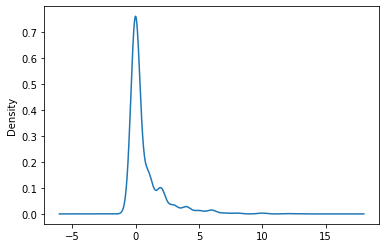

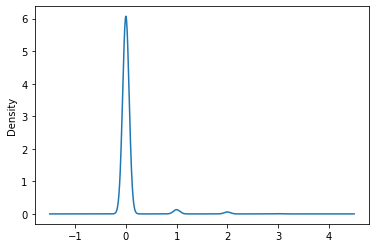

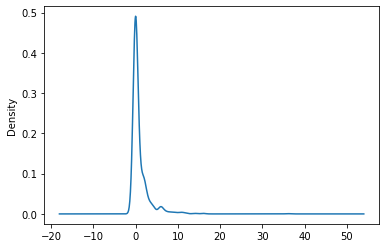

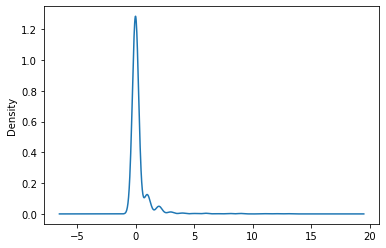

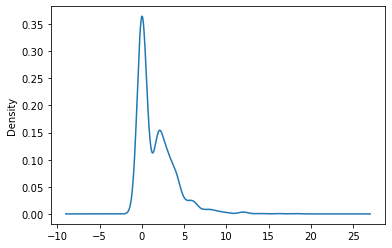

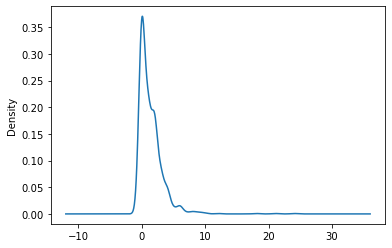

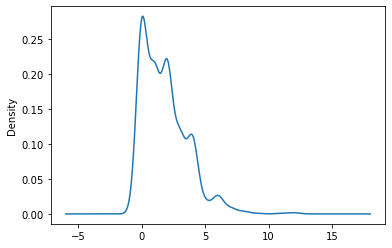

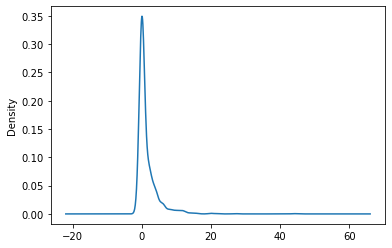

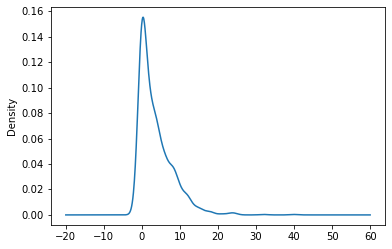

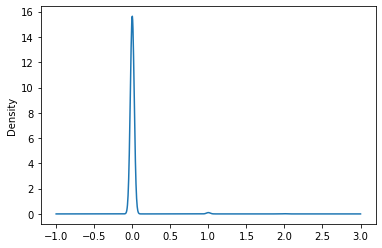

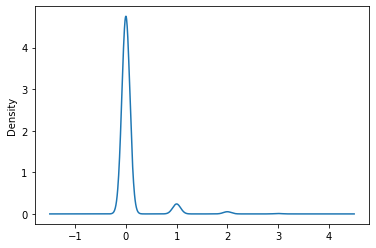

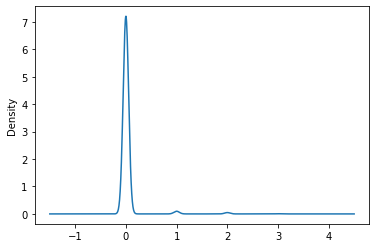

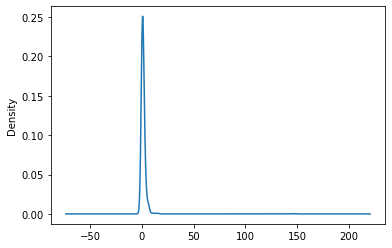

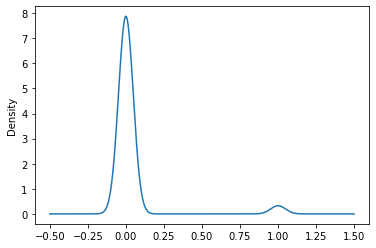

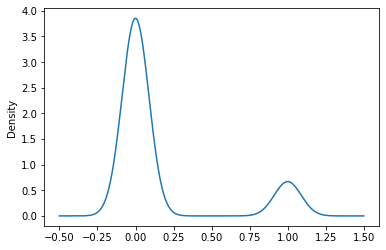

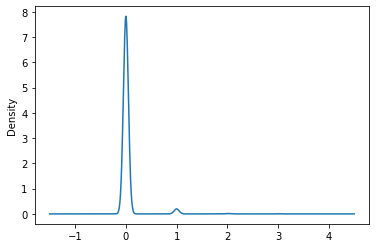

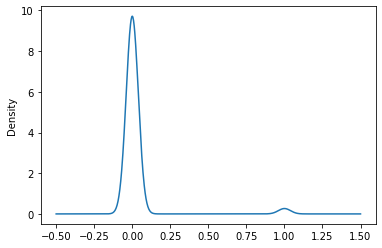

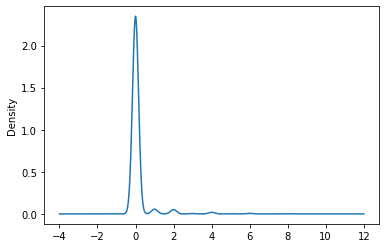

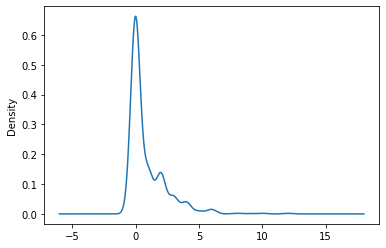

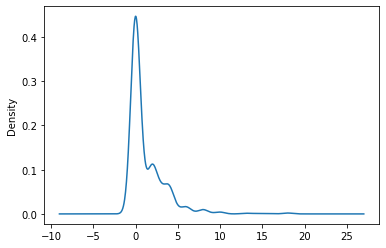

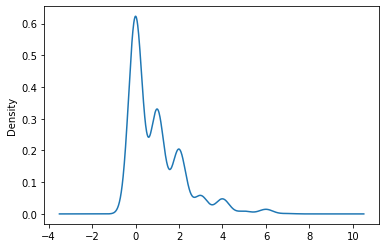

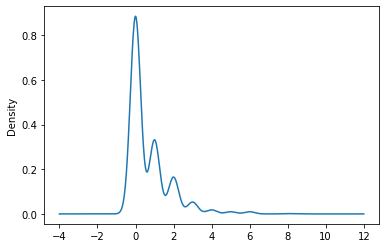

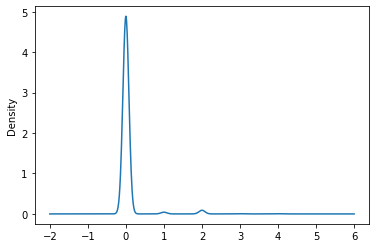

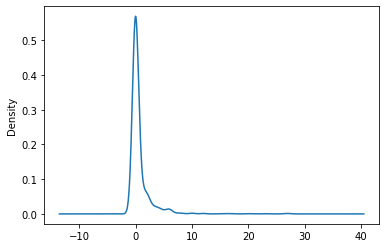

In [6]:
for i in data_cat.columns :
    data_cat[i].plot(kind='kde')
    plt.show()

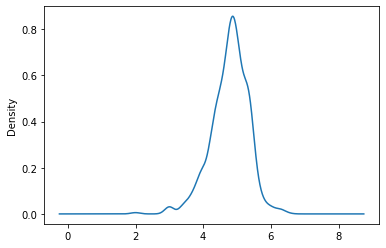

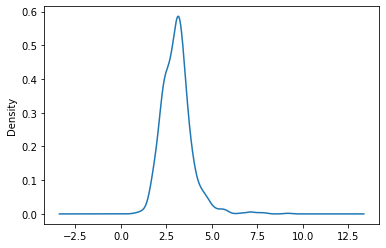

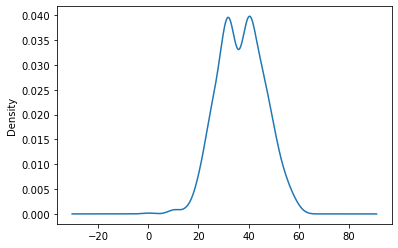

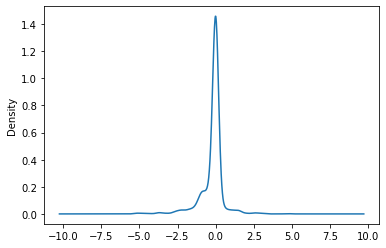

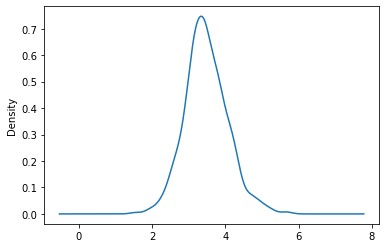

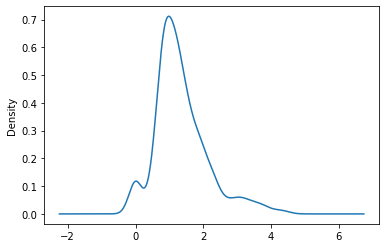

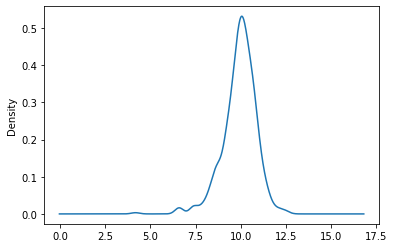

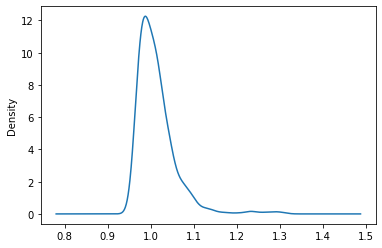

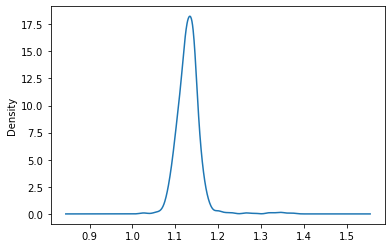

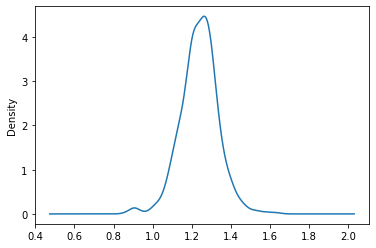

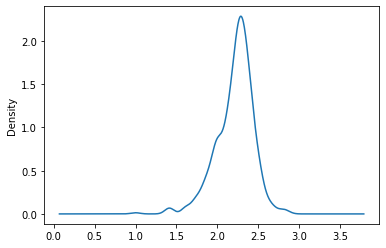

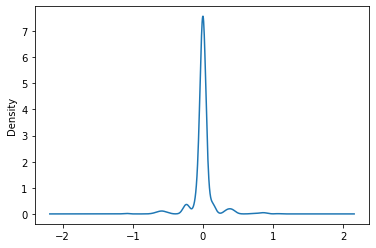

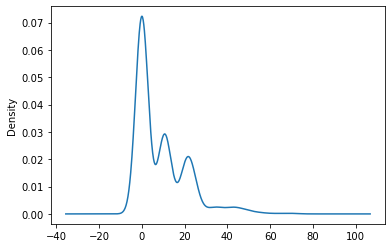

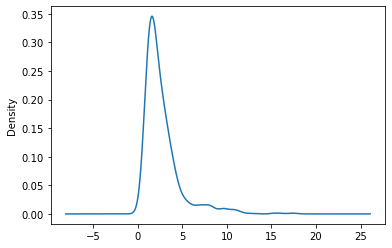

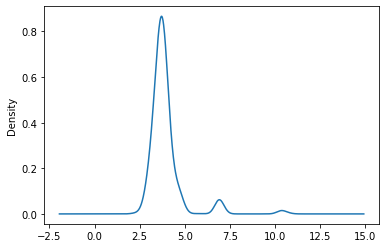

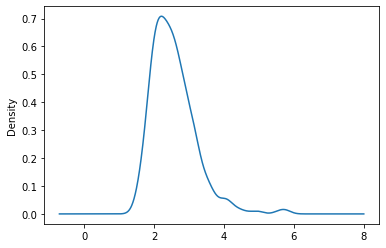

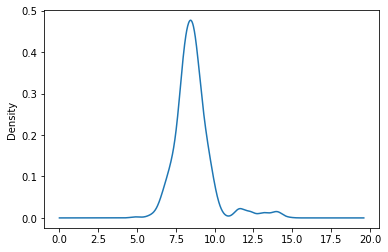

In [7]:
for i in data_float.columns :
    data_float[i].plot(kind='kde')
    plt.show()

In [8]:
scale1 = StandardScaler()
scale1.fit(data_float)
scale_data1 = scale1.transform(data_float)

In [9]:
scale_data1

array([[-1.57986474, -0.45565213, -0.61877011, ..., -0.97008536,
        -1.50580074, -1.1088244 ],
       [-1.12071001, -1.14946633, -0.68441468, ..., -0.60376607,
        -0.92055049, -1.10560222],
       [-1.55608382,  0.21866548, -1.13298593, ..., -0.84297457,
        -0.22011801, -0.82849519],
       ...,
       [ 0.15797191, -1.5675601 ,  0.80352899, ..., -0.07030109,
         0.02736814,  0.73103739],
       [ 0.68664011, -1.65854423,  2.08359817, ...,  1.89140879,
        -0.78357703,  1.95385271],
       [ 0.53663737, -0.49428428,  1.90854598, ...,  0.09083937,
        -0.54854302,  0.40318111]])

In [10]:
scale2 = StandardScaler()
scale2.fit(data_cat)
scale_data2 = scale2.transform(data_cat)

In [11]:
data_f = np.concatenate((scale_data1,scale_data2),axis=1)
data_f

array([[-1.57986474, -0.45565213, -0.61877011, ..., -0.62966664,
        -0.16054515, -0.32312337],
       [-1.12071001, -1.14946633, -0.68441468, ..., -0.62966664,
        -0.16054515, -0.32312337],
       [-1.55608382,  0.21866548, -1.13298593, ..., -0.62966664,
        -0.16054515, -0.32312337],
       ...,
       [ 0.15797191, -1.5675601 ,  0.80352899, ...,  3.95802883,
         2.97603138, -0.32312337],
       [ 0.68664011, -1.65854423,  2.08359817, ...,  6.71064611,
        -0.16054515,  0.12365927],
       [ 0.53663737, -0.49428428,  1.90854598, ..., -0.62966664,
        -0.16054515,  0.57044192]])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(data_f,target)

Let's try to Grid Search on couple of models (Logistic Regression, KNN, XGBoost, SVC)

In [13]:
model1 = LogisticRegression().fit(X_train,y_train)
precision_score(y_test,model1.predict(X_test))

0.7710843373493976

In [14]:
model2 = KNeighborsClassifier().fit(X_train,y_train)
precision_score(y_test,model2.predict(X_test))

0.7840909090909091

In [15]:
model3 = XGBClassifier().fit(X_train,y_train)
precision_score(y_test,model3.predict(X_test))

0.782051282051282

In [16]:
model4 = SVC().fit(X_train,y_train)
precision_score(y_test,model4.predict(X_test))

0.8311688311688312